<a href="https://colab.research.google.com/github/memelordmaddy/WiDS-2023/blob/main/Copy_of_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST
Our objective is to build a neural network for the classification of the MNIST dataset. This neural network will comprise two layers, each with 10 nodes, and an input layer with 784 nodes corresponding to the image pixels. The specific structure of the neural network is outlined below, where $X$ represents the input, $A^{[0]}$ denotes the first layer, $Z^{[1]}$ signifies the unactivated layer 1, $A^{[1]}$ stands for the activated layer 1, and so forth. The weights and biases are represented by $W$ and $b$ respectively:


<div align="center">

$A^{[0]}=X$

$Z^{[1]}=W^{[1]}A^{[0]}+b^{[1]}$

$A^{[1]}=\text{ReLU}(Z^{[1]})$

$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$

$A^{[2]}=\text{softmax}(Z^{[2]})$
</div>




You have the flexibility to create any function within or outside the class, allowing you to modify parameters as needed

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

### Required functions

In [ ]:
# activation and loss functions
def ReLU(x):
    return np.maximum(0,x)

def derivative_ReLU(x):
    return np.where(x>0 , 1, 0)

def softmax(x):
    expx = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return expx / np.sum(expx, axis=-1, keepdims=True)


In [ ]:
#complete the class of neural network

class NN:
  def __init__(self):
      self.w1 = np.random.randn(784, 10)
      self.b1 = np.zeros((1, 10))
      self.w2 = np.random.randn(10, 10)
      self.b2 = np.zeros((1, 10))
      self.w3 = np.random.randn(10, 10)
      self.b3 = np.zeros((1, 10))

  def forward_propagation(self, X):
      self.A0 = X
      self.Z1 = np.dot(self.A0, self.w1) + self.b1
      self.A1 = ReLU(self.Z1)
      self.Z2 = np.dot(self.A1, self.w2) + self.b2
      self.A2 = ReLU(self.Z2)
      self.Z3 = np.dot(self.A2, self.w3) + self.b3
      self.A3 = softmax(self.Z3)
      return self.A3

  def one_hot( self, label): #return a 0 vector with 1 only in the position corresponding to the value in test target
    one_hot_labels = np.zeros((len(label), 10))
    for i, label in enumerate(label):
      one_hot_labels[i, label] = 1
    return one_hot_labels

  def backward_propagation(self, X, y):
        loss = -np.sum(y * np.log(self.A3 + 1e-15)) / X.shape[0]
        self.dZ3 = self.A3 - y
        self.dW3 = np.dot(self.A2.T, self.dZ3)
        self.db3 = np.sum(self.dZ3, axis=0, keepdims=True)
        self.dZ2 = np.dot(self.dZ3, self.w3.T) * derivative_ReLU(self.Z2)
        self.dW2 = np.dot(self.A1.T, self.dZ2)
        self.db2 = np.sum(self.dZ2, axis=0, keepdims=True)
        self.dZ1 = np.dot(self.dZ2, self.w2.T) * derivative_ReLU(self.Z1)
        self.dW1 = np.dot(X.T, self.dZ1)
        self.db1 = np.sum(self.dZ1, axis=0, keepdims=True)
        return loss

  def update_params(self):
        self.w3 -= 0.0001 * self.dW3
        self.b3 -= 0.0001 * self.db3
        self.w2 -= 0.0001 * self.dW2
        self.b2 -= 0.0001 * self.db2
        self.w1 -= 0.0001 * self.dW1
        self.b1 -= 0.0001 * self.db1

  def get_predictions(self, X):
      return np.argmax(self.forward_propagation(X), axis=1)

  def get_accuracy(self, X, y):
      accuracy = np.mean(self.get_predictions(X) == np.argmax(y, axis=1))
      return accuracy

  def gradient_descent(self, X_train, y_train, epochs):
      for epoch in range(epochs):
            self.forward_propagation(X_train)
            loss = self.backward_propagation(X_train, y_train)
            self.update_params()

  def make_predictions(self, X):
      return self.get_predictions(X)

  def show_predictions(self, X, y, num_samples=10):
        sample = np.random.choice(X.shape[0], num_samples, replace=False)
        for index in sample:
            sample_image = X[index].reshape(28, 28)
            actual_label = y[index]
            prediction = self.get_predictions(X[index].reshape(1, -1))[0]
            plt.imshow(sample_image, cmap='Greens')
            plt.title(f"Actual: {actual_label}, Predicted: {prediction}")
            plt.show()


## main

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

###preprocessing the data


In [ ]:
# all values of pixels should be in range[0,1]
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
nn= NN()
Y_train_one_hot = nn.one_hot(Y_train)
Y_test_one_hot = nn.one_hot(Y_test)

###Model Training

In [ ]:
nn.gradient_descent(X_train, Y_train_one_hot, epochs= 1000)
accuracy = nn.get_accuracy(X_test, Y_test_one_hot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

KeyboardInterrupt: 

### Viewing Results


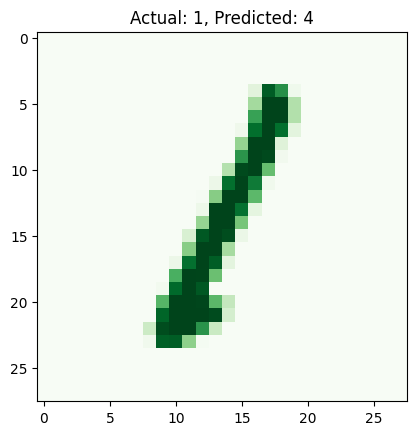

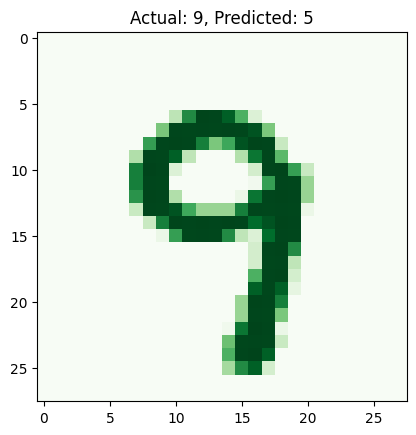

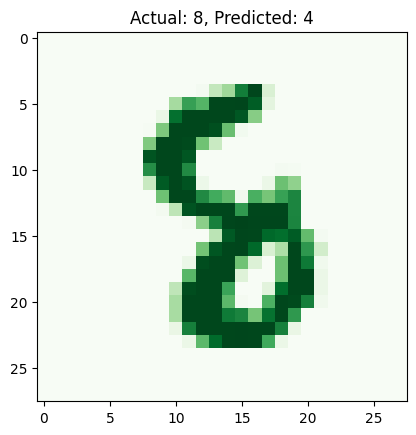

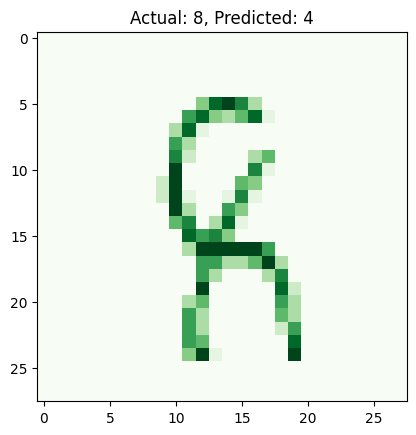

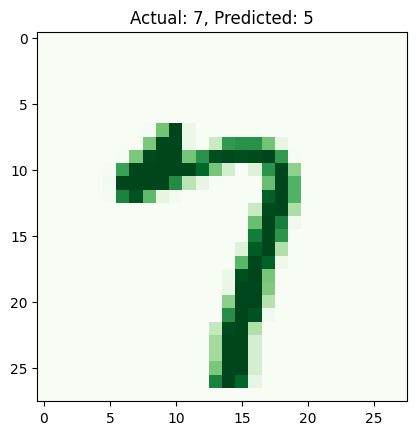

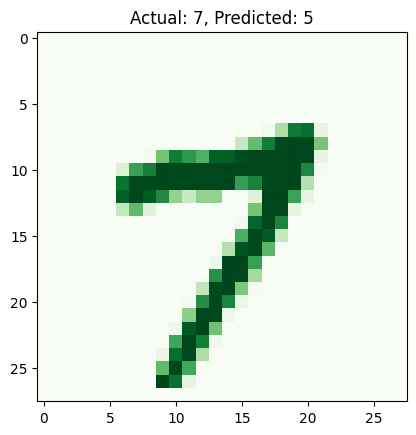

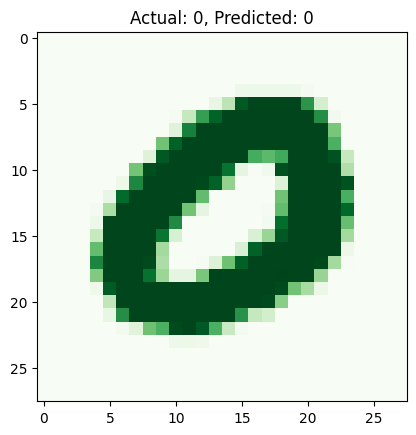

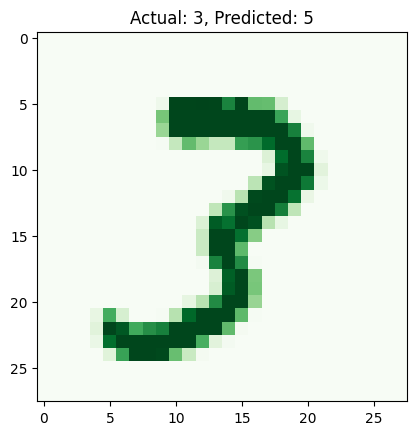

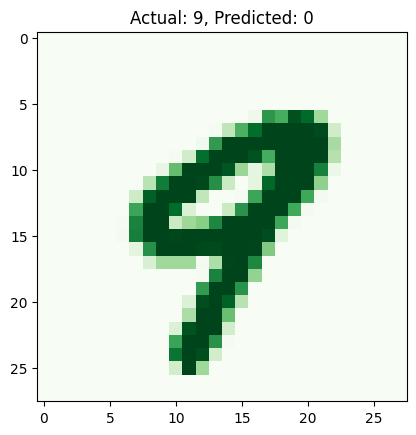

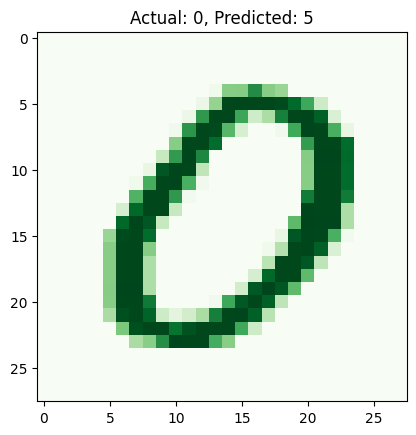

In [ ]:
#viewing prediction for 10 random images in dataset
nn.show_predictions(X_test, Y_test, num_samples=10)